# Example code for WSI tile extraction.

You may wish to utilise the surgen conda env from the [../reporoducibility/environment](https://github.com/CraigMyles/SurGen-Dataset/tree/main/reproducibility/environment) directory. If so - ``pip install jupyter notebook`` will enable you to load and run this notebook.

In [1]:
#!pip install pylibCZIrw matplotlib requests

In [2]:
# Function to download the file if it does not exist
import requests
def download_file(url, local_path):
    if not os.path.exists(local_path):
        os.makedirs(os.path.dirname(local_path), exist_ok=True)
        print(f"File not found. Downloading from {url}...")
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for HTTP errors
        with open(local_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"File downloaded and saved to {local_path}.")
    else:
        print(f"Using file at {local_path}.")

## This example will load a whole slide image, find the central point, and extract a patch of size 4096x4096 at the highest possible resolution.

Using file at /data2/SR1482_40X_HE/SR1482_40X_HE_T101_01.czi.


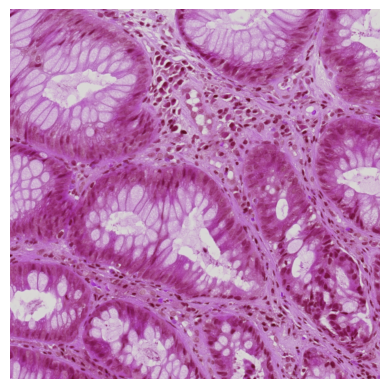

Bounding Box: {'T': (0, 1), 'Z': (0, 1), 'C': (0, 1), 'X': (-403222, -309376), 'Y': (68746, 196736)}
ROI Coordinates: (roi_x, roi_y) = (-356299, 132741)


In [3]:
from pylibCZIrw import czi
import matplotlib.pyplot as plt
import os

# URL to the file
file_url = "https://www.ebi.ac.uk/biostudies/files/S-BIAD1285/SR1482_WSIs/SR1482_40X_HE_T101_01.czi"

# Local path where the file should be stored
local_path = "/data2/SR1482_40X_HE/SR1482_40X_HE_T101_01.czi"

# Download the file if necessary
download_file(file_url, local_path)

# Open the CZI file and read a patch from the centre
with czi.open_czi(local_path) as czidoc:
    # Get the total bounding box
    bounding_box = czidoc.total_bounding_box

    # Extract the X and Y ranges from the bounding box
    x_min, x_max = bounding_box['X']
    y_min, y_max = bounding_box['Y']

    # Calculate the centre of the image
    centre_x = (x_min + x_max) // 2
    centre_y = (y_min + y_max) // 2

    # Define the patch size
    patch_size = 1024*4  # Adjust if necessary

    # Make sure the ROI coordinates are within bounds
    roi_x = max(x_min, min(centre_x, x_max - patch_size))
    roi_y = max(y_min, min(centre_y, y_max - patch_size))

    # Read the patch at full resolution (zoom=1.0)
    patch = czidoc.read(roi=(roi_x, roi_y, patch_size, patch_size), zoom=1)

# Display the patch
plt.imshow(patch)
plt.axis('off')
plt.show()

# Print the bounding box and ROI coordinates for reference
print("Bounding Box:", bounding_box)
print("ROI Coordinates: (roi_x, roi_y) =", (roi_x, roi_y))

## Similarly, we can select any czi image from the cohort to run this with similar parameters. Here we retrieve a 2048x2048 patch from the whole slide image.

Using file at /data2/SR1482_40X_HE/SR1482_40X_HE_T232_01.czi.


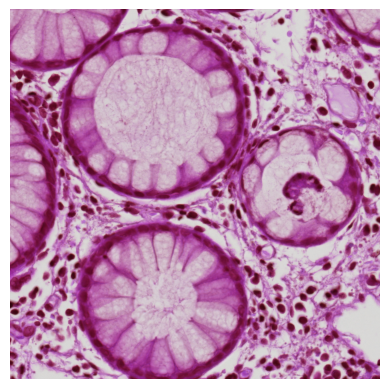

In [4]:
from pylibCZIrw import czi

# URL to the file
file_url = "https://www.ebi.ac.uk/biostudies/files/S-BIAD1285/SR1482_WSIs/SR1482_40X_HE_T232_01.czi"

# Local path where the file should be stored
local_path = "/data2/SR1482_40X_HE/SR1482_40X_HE_T232_01.czi"

# Download the file if necessary
download_file(file_url, local_path)

# Open the CZI file and read a patch from the center
with czi.open_czi(local_path) as czidoc:
    bbox = czidoc.total_bounding_box
    x_min, x_max = bbox['X']
    y_min, y_max = bbox['Y']

    patch_size = 2048

    # Calculate the center coordinates
    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2

    # Calculate ROI coordinates
    roi_x = center_x - patch_size // 2
    roi_y = center_y - patch_size // 2

    # Read the patch at full resolution
    patch = czidoc.read(roi=(roi_x, roi_y, patch_size, patch_size), zoom=1.0)

plt.imshow(patch)
plt.axis('off')
plt.show()

## Any area can be specified. Note that the image will not necessarily begin at (0,0)

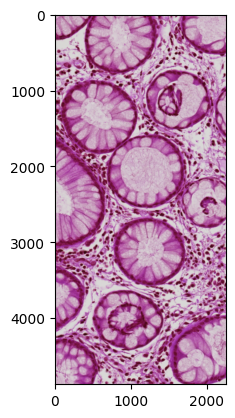

In [5]:
from pylibCZIrw import czi

# Path to the CZI file
path = "/data2/SR1482_40X_HE/SR1482_40X_HE_T232_01.czi"

# Open the CZI file and read a patch from the center
with czi.open_czi(path) as czidoc:
    bbox = czidoc.total_bounding_box
    x_min, x_max = bbox['X']
    y_min, y_max = bbox['Y']

    patch_size = 2048

    # Calculate the center coordinates
    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2

    # Calculate ROI coordinates
    roi_x = center_x - patch_size // 2
    roi_y = center_y - patch_size // 2

    # Read the patch at full resolution
    patch = czidoc.read(
        roi=(roi_x-400, roi_y-1500, 1125*2, 2436*2), 
        zoom=1.0 # Render at full (40X) resolution
    )

plt.imshow(patch)
plt.show()

Using file at /data2/SR386_WSIs/SR386_40X_HE_T103_01.czi.


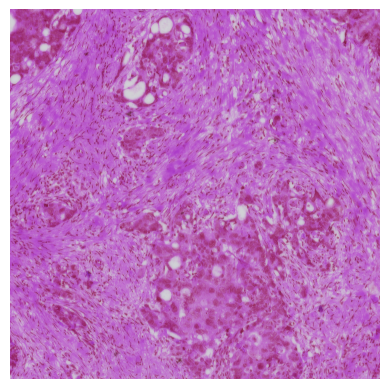

In [6]:
from pylibCZIrw import czi

# URL to the file
file_url = "https://www.ebi.ac.uk/biostudies/files/S-BIAD1285/SR386_WSIs/SR386_40X_HE_T103_01.czi"

# Local path where the file should be stored
local_path = "/data2/SR386_WSIs/SR386_40X_HE_T103_01.czi"

# Download the file if necessary
download_file(file_url, local_path)

# Open the CZI file and read a patch from the center
with czi.open_czi(local_path) as czidoc:
    bbox = czidoc.total_bounding_box
    x_min, x_max = bbox['X']
    y_min, y_max = bbox['Y']

    patch_size = 8192

    # Calculate the center coordinates
    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2

    # Calculate ROI coordinates
    roi_x = center_x - patch_size // 2
    roi_y = center_y - patch_size // 2

    # Read the patch at full resolution
    patch = czidoc.read(roi=(roi_x, roi_y, patch_size, patch_size), zoom=1)

plt.imshow(patch)
plt.axis('off')
plt.show()